# Advertising Sales Channel Prediction


## Importing Libraries

In [1]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing all required libraries

In [2]:
#Import the dataset

df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Importing the dataset and analyze all the columns 

In advertising sales dataset,

- Input variables : TV, radio, newspaper
- Target variable : sales

## Shape of data with number of rows and columns


In [3]:
df.shape

(200, 5)

There are 200 rows and 5 columns in dataset

## Detailed Description

In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


We can see detailed description of all rows and columns like count, mean value, standard deviation, minimum and maximum values, 25th, 50th(median) and 75th percentile values.

## Datatypes of all columns

In [5]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

All the columns are having float datatype except Unnamed column. Unnamed column is having integer datatype.

## Checking for null values

In [6]:
#check for is there any null values present in the dataset 

df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no missing value in whole dataset. As we see no null values present, it's safe to proceed.

<AxesSubplot:>

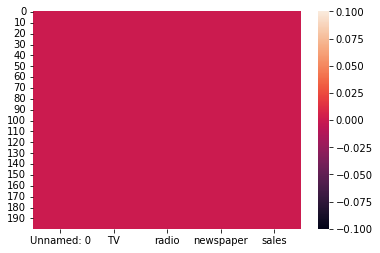

In [7]:
#To check missing values
sns.heatmap(df.isnull())

In [8]:
#checking if any space available as a value 
df.loc[df['sales']== " "]

,Unnamed: 0,TV,radio,newspaper,sales


As we see there are no missing or spaces are available in target variable.

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)

Uni variate analysis works with only one variable, hence it is called as uni variate.

### 1. Distplot

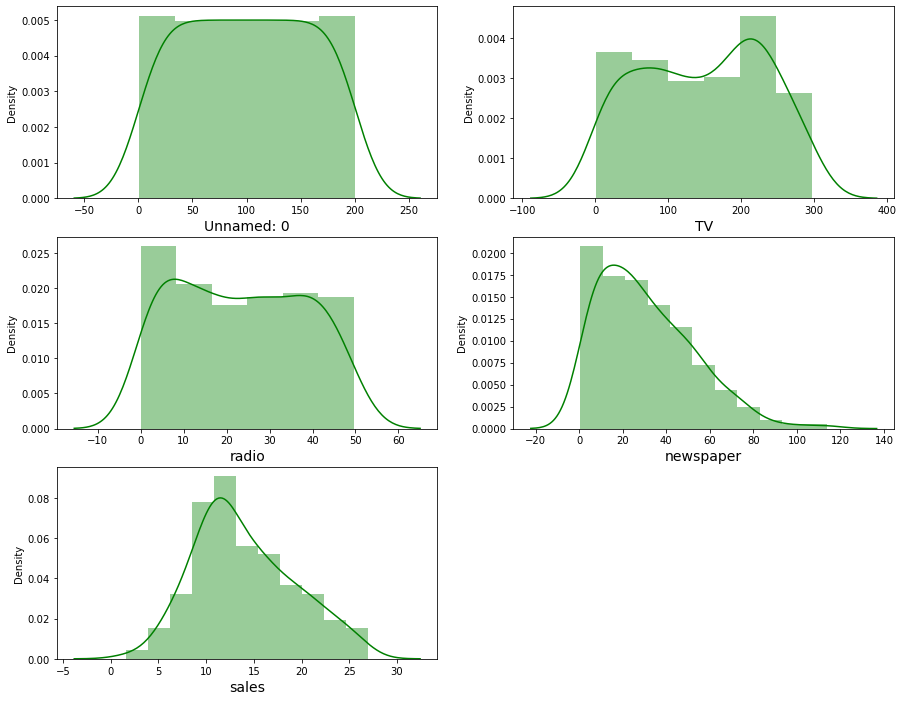

In [9]:
#Relationship Visualizing

plt.figure(figsize = (15,12), facecolor = 'white')
eda = 1

for column in df:
    if eda <= 6: # as we see there are five columns in the data
        ax = plt.subplot(3,2,eda)
        sns.distplot(df[column], color = 'g')
        plt.xlabel(column,fontsize=14)
        
    eda += 1
plt.show()

As shown in distplot newspaper input variable is having skewness in it, other Data columns are almost normally distributed. So, we need remove skewness from that input variable.

### 2. Histplot

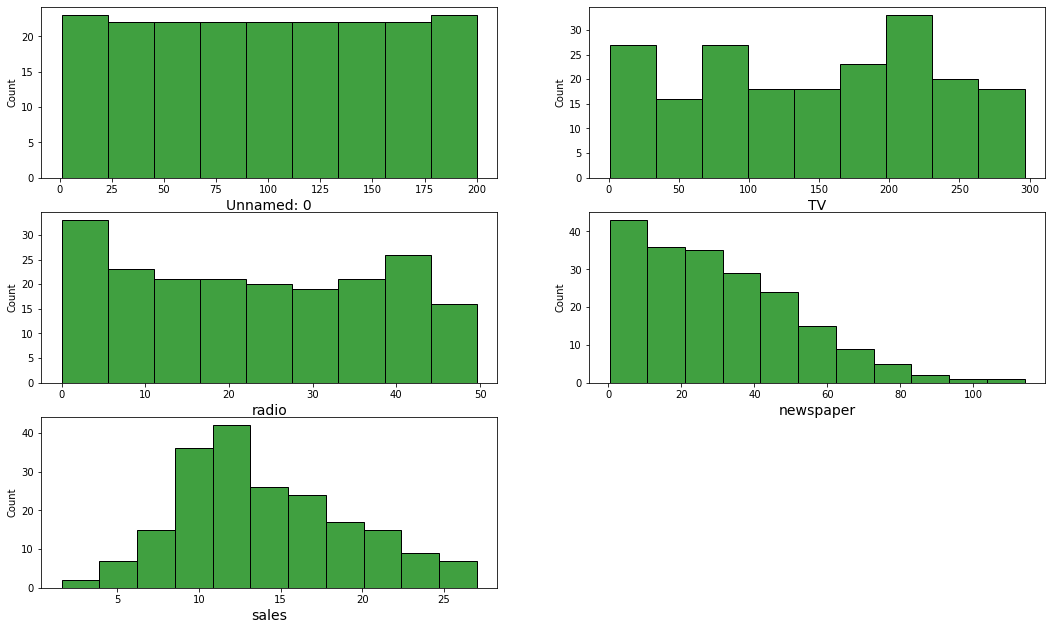

In [10]:
#Relationship Visualizing

plt.figure(figsize = (18,22), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 6: # as we see there are five columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sns.histplot(df[column], color = 'g')
        plt.xlabel(column,fontsize=14)
        
    plotnumber += 1
plt.show()

### 3. Boxplot

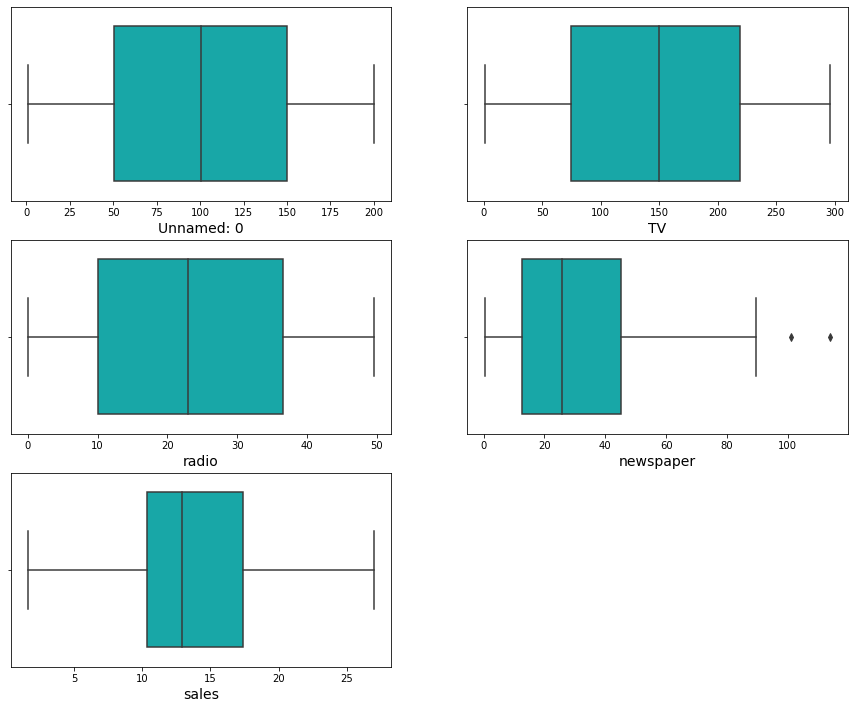

In [11]:
#Relationship Visualizing

plt.figure(figsize = (15,25), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 6: # as we see there are five columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(df[column], color = 'c')
        plt.xlabel(column,fontsize=14)
        
    plotnumber += 1
plt.show()

As shown in boxplot, newspaper input variable is having outliers. So need to remove that.

### Bi variate analysis

Bi variate analysis is works with two variables.

### Scatterplot

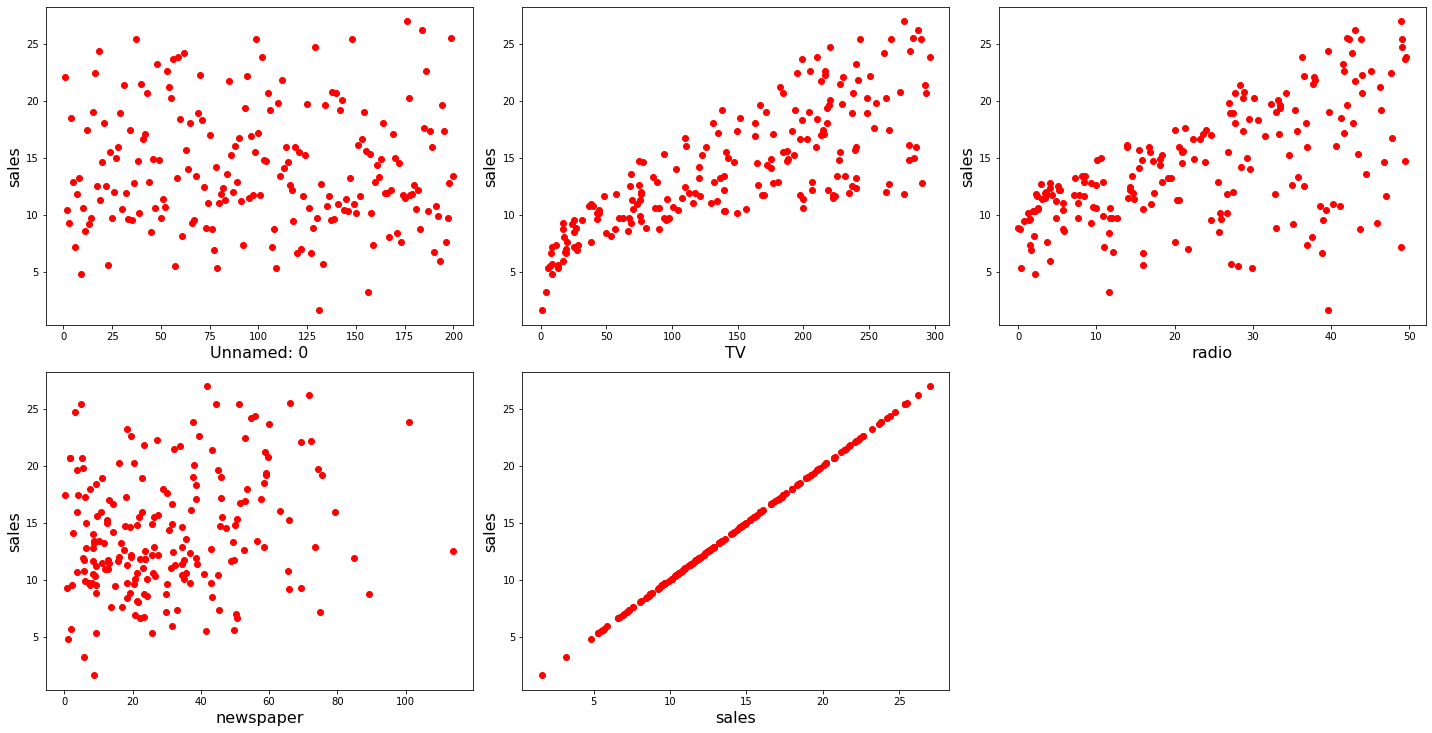

In [12]:
#Relationship Visualizing

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 6:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],df['sales'], color='r')
        plt.xlabel(column,fontsize=16)
        plt.ylabel('sales', fontsize=16)
    plotnumber += 1
plt.tight_layout()


as we have seen in plot TV and Radio is having almost linear relationship with target variable and newspaper is having non linear realationship with target variable(sales). and outliers are also present in newspaper column.

### Lineplot

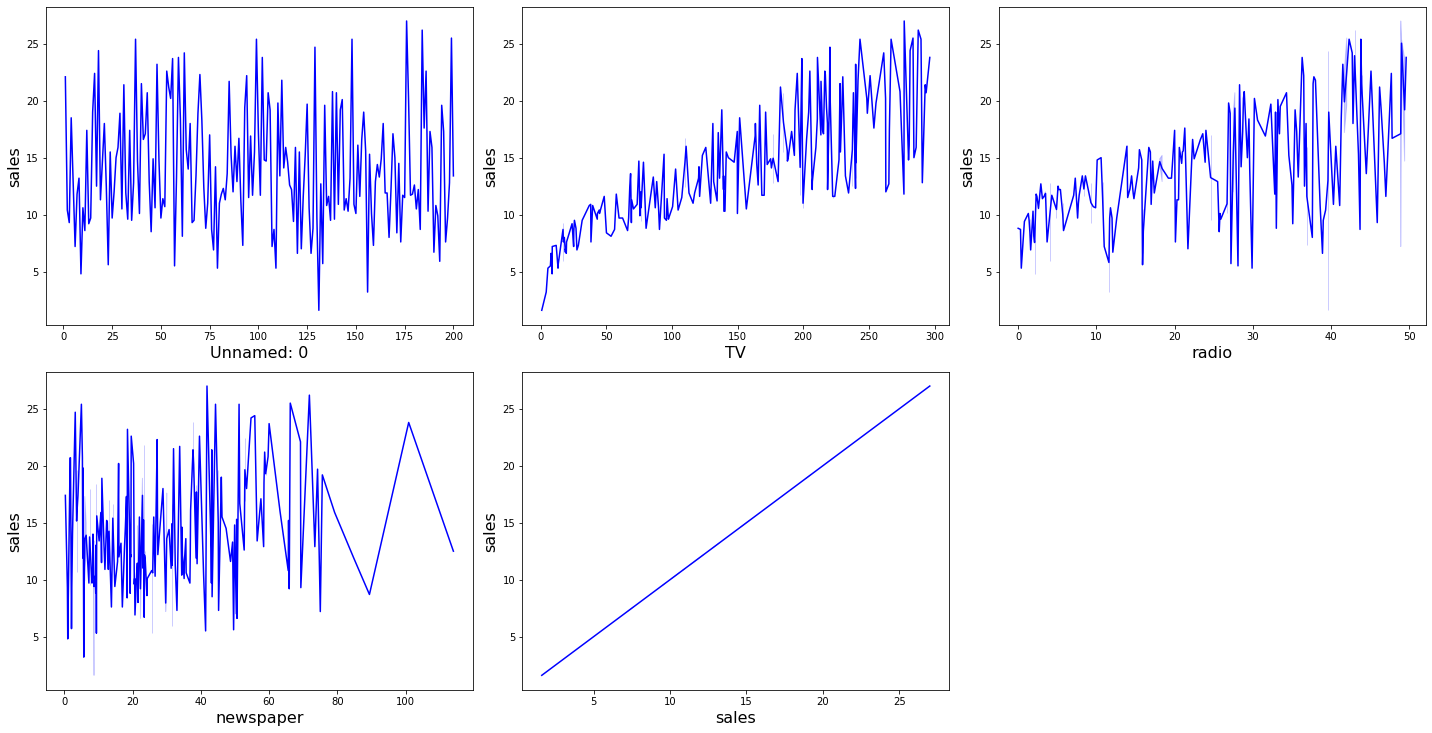

In [13]:
#Relationship Visualizing

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 6:
        ax = plt.subplot(5,3,plotnumber)
        sns.lineplot(df[column],df['sales'], color='b')
        plt.xlabel(column,fontsize=16)
        plt.ylabel('sales', fontsize=16)
    plotnumber += 1
plt.tight_layout()


as we have seen in plot TV and Radio is having almost linear relationship with target variable and newspaper is having non linear realationship with target variable(sales).

### KDE plot - Kernel Density Plot

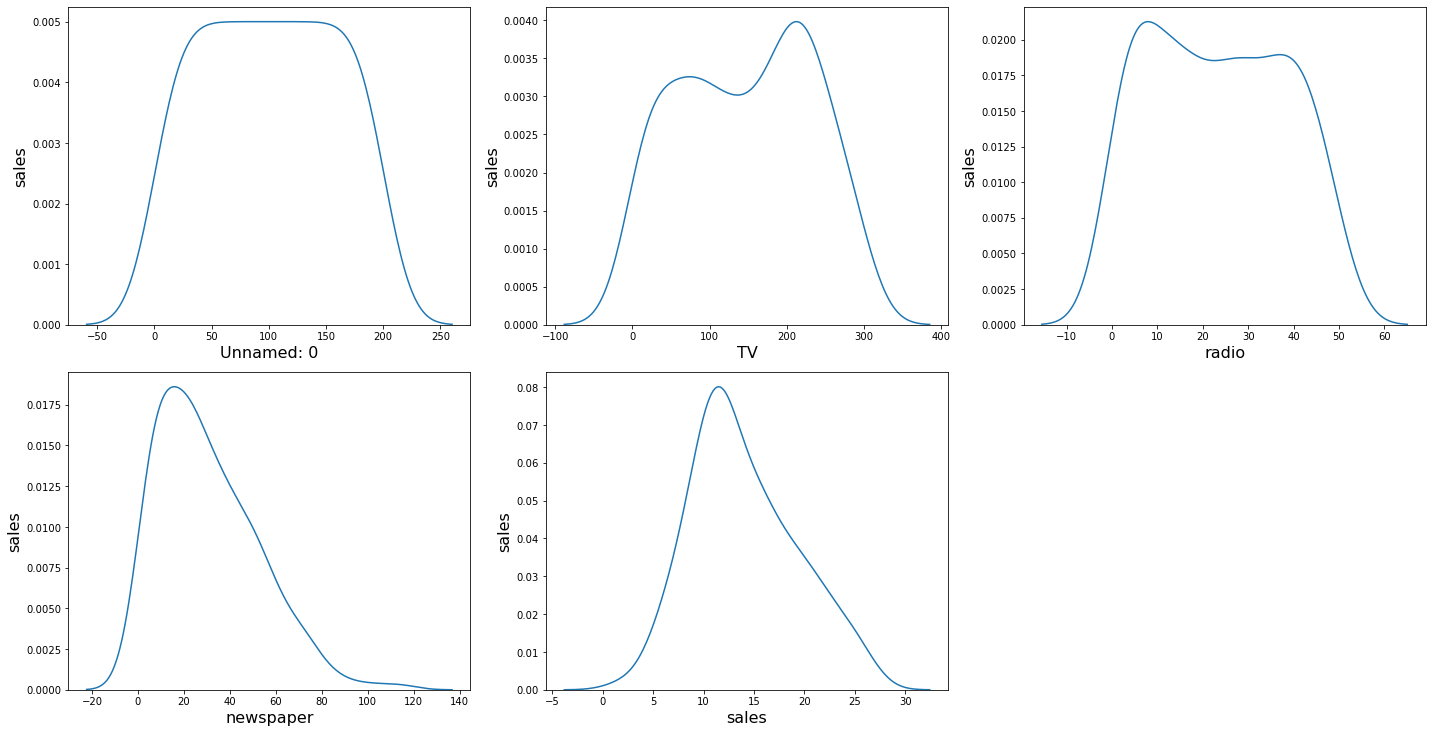

In [14]:
#Relationship Visualizing

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 6:
        ax = plt.subplot(5,3,plotnumber)
        sns.kdeplot(data=df[column])
        plt.xlabel(column,fontsize=16)
        plt.ylabel('sales', fontsize=16)
    plotnumber += 1
plt.tight_layout()


KDE represents the data using a continuous probability density curve in one or more dimensions.

### Multi Variate analysis

Multi variate analysis find the relationship with all variables. Now we will visualize the data and check the coiefficient of multicollinearity

In [15]:
#check correlation
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Let's create a heatmap to visualize the data better.

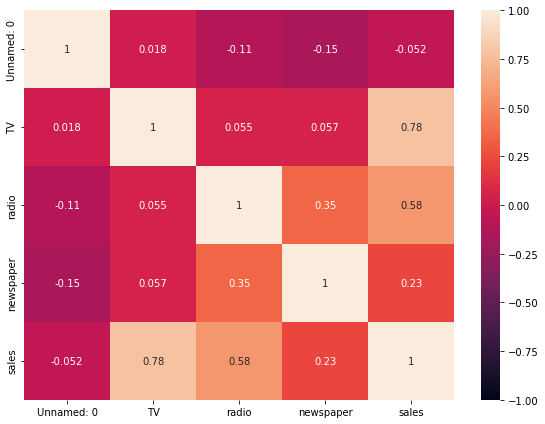

In [16]:
df_cor = df.corr()

plt.figure(figsize = (8,6))
sns.heatmap(df_cor, vmin=-1, vmax= 1, annot=True)
plt.tight_layout()

As shown in heatmap TV and sales are strongly correlated with each other and Unnamed column is weekly correlate with targate variable.

#### Find out which columns are positively and negatively correlated with each other


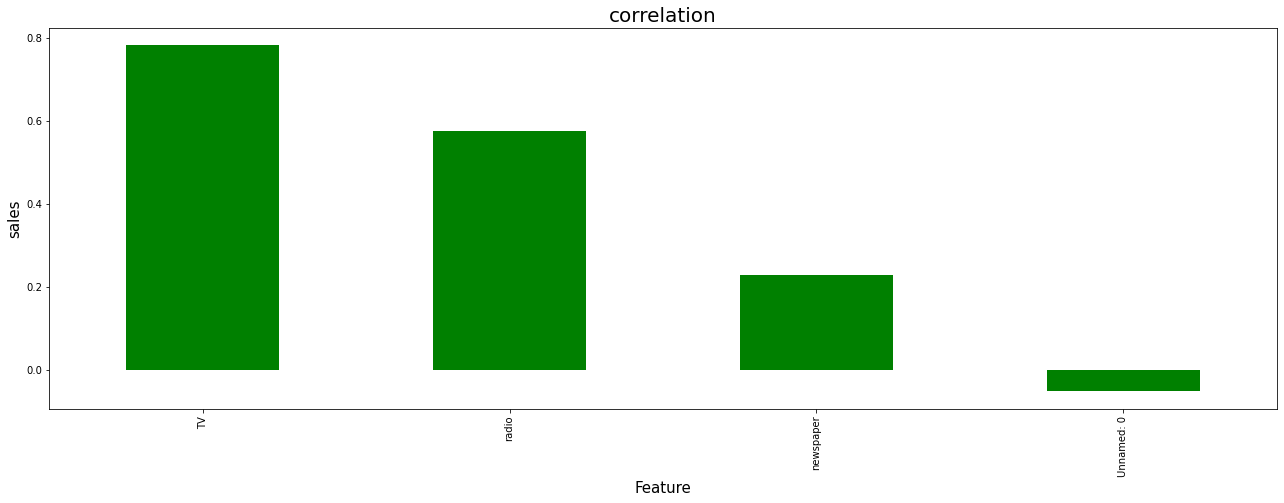

In [17]:
plt.figure(figsize=(22,7))
df.corr()['sales'].sort_values(ascending = False).drop(['sales']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('sales', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

Unnamed column is weekly correlate with targate variable.

#### After visualization we conclude that all input variable are having good correlation with target variable except Unnamed column and Unnamed column is having poorly correlated with tagret variable. So, need to drop that column

### Drop Unnamed column

In [18]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [19]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Remove Outliers

As we see outliers present in newpaper column. So, first remove outliers.

### 1. Outlier removal using Zscore


In [20]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df[['TV', 'radio', 'newspaper']]) #Put contineuos/float input variable in z-score 
abs_z_score = np.abs(z_score)

data = (abs_z_score < 3).all(axis = 1)

new_df = df[data]

print("shape before :", df.shape)
print("shape after :", new_df.shape)
print("Percentage Loss :", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before : (200, 4)
shape after : (198, 4)
Percentage Loss : 0.01


1% data loss after using zscore technique

99% data remains

## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

### Visualize data again to check outliers are present at low side or high side


In [21]:
data = df

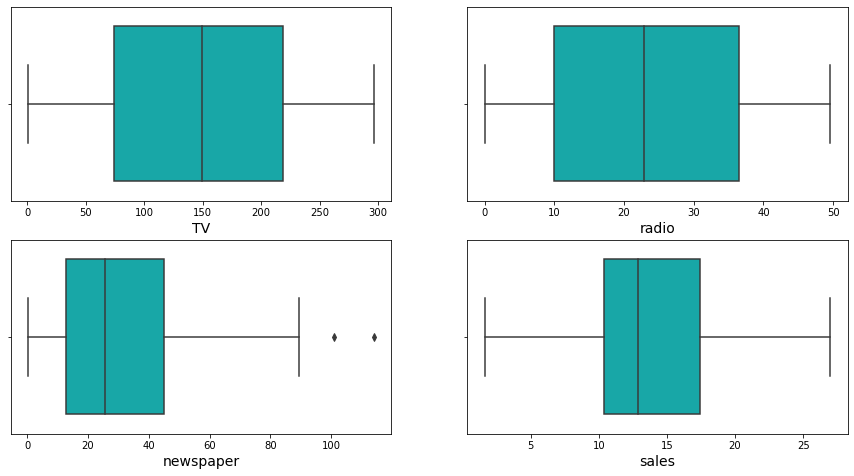

In [22]:
#Relationship Visualizing

plt.figure(figsize = (15,25), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 6: # as we see there are five columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(df[column], color = 'c')
        plt.xlabel(column,fontsize=14)
        
    plotnumber += 1
plt.show()


As shown in plot outliers is present only in newspaper column, so remove it first.

In [23]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data.quantile(0.25)

#3rd quantile 75%
q3 = data.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [24]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Outlier detection formula

- Higher side ==> Q3 + (1.5 * IQR)
- Lower side ==> Q1 - (1.5 * IQR)

as outliers present in higher side only so we will go with higher side formula

In [25]:
#as shown in boxplot we have outlier in higher side of newspaper
#Remove outliers from higher side so, use higher side formula

newspaper_ = (q3.newspaper + (1.5*(iqr.newspaper)))
newspaper_

93.625

In [26]:
index_out = np.where(data['newspaper'] > newspaper_)
data = data.drop(data.index[index_out])
data.shape
data.reset_index()

,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,195,38.2,3.7,13.8,7.6
194,196,94.2,4.9,8.1,9.7
195,197,177.0,9.3,6.4,12.8
196,198,283.6,42.0,66.2,25.5


after removing outliers from newspaper 198 rows will remain in dataframe.

#### After removing outliers using IQR technique there are 198 rows will remain in dataset.

Now, find how much data loss in IQR method

In [27]:
((200-198)/200)*100

1.0

1.0% data loss in IQR method

99.0% data remains after removing outliers using IQR technique

### After applying Zscore and IQR technique to remove outliers, we conclude that from both the methods only 1% data will be lost so we can use any of these methods to remove the outliers.

## Check the skewness and remove that


In [28]:
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

As we see there are newspaper variable is skewed, whoes value is not lies between -0.5 to +0.5 this range.

#### We need to remove skewness from newspaper column

## Apply Power transformation to remove skewness


In power transformation we will take the mean value in place of 0th value skewed data and convert that into normal data(distribution)/less skewed data.

In [29]:
new_df['newspaper'] = new_df['newspaper'].replace(0,new_df['newspaper'].mean())

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

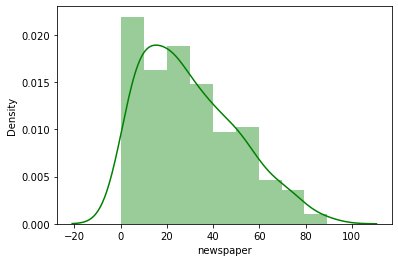

In [30]:
sns.distplot(new_df['newspaper'], color='g')


As shown in plot less skewness present after using power transformation skewness removal technique.

## Seperating the columns into featuers and target:

### X=Features, Y=Target

In [31]:
x = new_df.drop(columns = 'sales', axis=1)
y = new_df['sales']

### Scalling technique


In [32]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

using standard scaler technique variables are scaled now.

## Variance inflation factor


In [33]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.003863,TV
1,1.137887,radio
2,1.137631,newspaper


as we have seen in the table vif value is not greater than 5 for any columns, so no need to drop columns.

In [34]:
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Finding best random state


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [36]:
from sklearn.tree import DecisionTreeRegressor
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.9763565370596703 on Random_state  155


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.25, random_state = 155)


## 1.Linear Regression Model


In [38]:
from sklearn.linear_model import LinearRegression

lr =LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [39]:
pred_test=lr.predict(x_test)

print(r2_score(y_test,pred_test))

0.8863701695494537


### Cross Validation of Linear Regression


In [40]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(lr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8853605756683912

The r2 score for linear regression model is : 88.63%
    
Cross validation score for linear regression is : 88.53%

### Regularization

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [42]:
ls = Lasso(alpha = 0.1, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.8819651109245351

In [43]:
cv_score= cross_val_score(ls, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8855218632406787

The r2 score for linear regression model is : 88.19%
    
Cross validation score for linear regression is : 88.56%

## 2. Random Forest Regressor


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
rfr= RandomForestRegressor()
clf =GridSearchCV(rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [45]:
Rfr =RandomForestRegressor(criterion = "mae", max_features="auto")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

R2 Score:  97.90162720906056
Cross Val Score:  97.53931061697294


The r2 score for Random Forest Regressor model is : 97.90%
    
Cross validation score for Random Forest Regressor is : 97.54%

## 3. Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [47]:
pred_dt = dt.predict(x_test)
print(r2_score(y_test,pred_dt))

0.9766559462021246


In [48]:
cv_score= cross_val_score(dt, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9548101286995119

The r2 score for Decision tree Regressor model is : 97.66%
    
Cross validation score for Decision tree Regressor is : 95.48%

## 4. Support vector Regressor


In [49]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr))

0.8491097990165686


In [50]:
cv_score= cross_val_score(svr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8415472179655342

The r2 score for SVR model is : 84.91%
    
Cross validation score for SVR is : 84.15%

## Comparison of all model


       Algorithms               R2 score    Cross validation   Difference
    
1. Linear Regression        :    88.19%           88.56%           0.37% 
    
2. Random Forest Regressor  :    97.90%           97.54%           0.36%
    
3. Decision Tree Regressor  :    97.66%           95.48%           2.18%
    
4. Support Vector Regressor :    84.91%           84.15%           0.76%

### as shown in above table Random Forest Regressor is having minimum difference, so Random Forest Regressor is best model


## Hyperparameter tuning

In [51]:
#Random forest Regression
# see all the parameters of random forest Regressor
Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['mse', 'mae']}

GCV=GridSearchCV(RandomForestRegressor(),Parameters,cv=5)

#fit the all parameters in grid search cv and see the output
GCV.fit(x_train, y_train) 

GCV.best_params_ # printing the best parameters found by GridSearchCV


{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 700}

In [52]:
mod = RandomForestRegressor( criterion='mae', max_depth=8 , max_features='auto', n_estimators=700)

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(round(r2_score(y_test, pred)*100))

98


### after hyper parameter tunning r2 score is: 98%

## Saving the model


In [53]:
import joblib
joblib.dump(mod,"AdvertisingSalesChannelPrediction.pkl")

['AdvertisingSalesChannelPrediction.pkl']

## Loding model


In [54]:
model = joblib.load("AdvertisingSalesChannelPrediction.pkl")
prediction = model.predict(x_test)

#converted into data frame
prediction=pd.DataFrame(prediction)


In [55]:
#prediction saving
prediction.to_csv('ResultsAdvertisingChannel.csv', index = False)
